<!-- 
1. We need two datasets. (The ML model will learn from these datasets)

2. We will append or attach the datasets.

3. Pre-process the raw data. (Label Encoding, Missing values, Drop features)

4. Split the data into Training & Testing data.
   -  ML model will be trained on Training data.
   -  ML model will be evaluated on Test data. (To check how well model is performing on a given dataset)

5. Feed training data to ML model (Support Vector Machine Learning Model - Supervised Model)
   - In supervised model there are two labels:
        - Loan Approved 
        - Loan Disapproved

6. Once SVML is 'Trained' we will evaluate it against our Test data.
    It will tell us accuracy score of our model (How well our model performs)

7. When new data is fed to our 'Trained SVML' model it will predict an outcome/label. -->


### Importing Dependencies

In [74]:

#Data Cleaning, Processing, & Visualization:
import numpy as np      #For Linear Algebra & Array Handling 
import pandas as pd     #For Data Processing  (Data Frames - Structured Tables)
import matplotlib.pyplot as plt #For Graphical visualization
import seaborn as sns   #For statistical data visualization

#Train & Test:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #Split Train& Test Data

#ML Model:
from sklearn import svm #Support Vector Machine 
from sklearn.linear_model import LogisticRegression

### Data Collection

In [75]:
#Loading dataset for Training purpose
dataset=pd.read_csv('dataset/dataset.csv')

In [76]:
#Check dataset type (It shows it is a dataframe object)
type(dataset)

pandas.core.frame.DataFrame

In [77]:
#Check Total number of rows & columns in our dataset
dataset.shape

(614, 13)

In [78]:
#Checking first 5 rows of our dataset
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
#Checking dataset for Statistical Measures for Numerical Columns Only, and not Categorical columns
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Pre-processing & Cleaning

In [80]:
#Checking missing values in our dataset
missing_data = dataset.isnull().sum().to_frame()

#Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Missing Values in columns'})

#Print the results
print(missing_data)

                   Missing Values in columns
Loan_ID                                    0
Gender                                    13
Married                                    3
Dependents                                15
Education                                  0
Self_Employed                             32
ApplicantIncome                            0
CoapplicantIncome                          0
LoanAmount                                22
Loan_Amount_Term                          14
Credit_History                            50
Property_Area                              0
Loan_Status                                0


In [81]:
#Dropping Columns (Features) not required 
dataset.drop('Loan_ID',inplace=True,axis=1)

#Checking column again
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Visualization

<AxesSubplot: xlabel='Education', ylabel='count'>

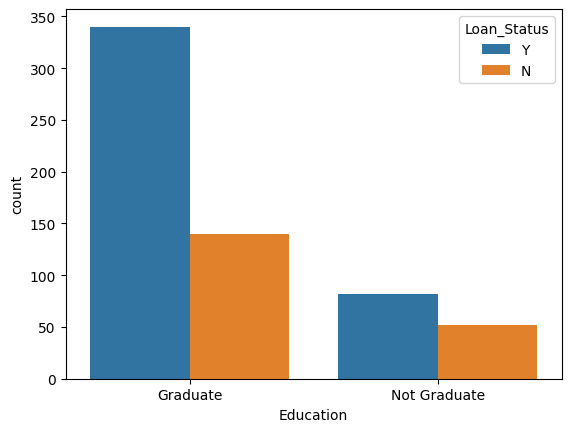

In [82]:
#Education vs Loan Status
#If you are a Graduate how likely are you to get a loan?
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

<AxesSubplot: xlabel='Married', ylabel='count'>

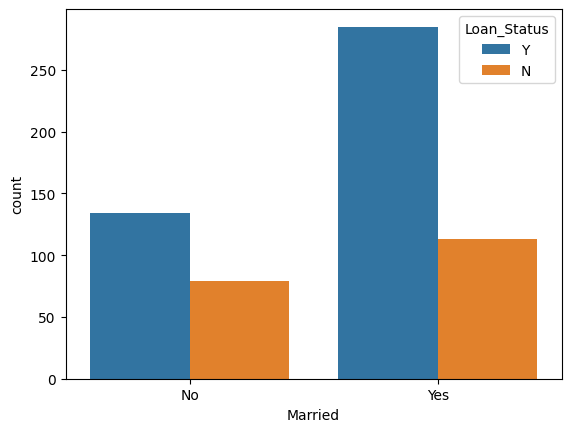

In [83]:
#Married vs Loan Status
#If you are married how likely are you to get a loan?
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

In [84]:
# plt.figure(figsize=(18, 6))
# plt.title("Relation Between Application Income vs Loan Amount ")

# plt.grid()
# plt.scatter(data['ApplicantIncome'] , data['LoanAmount'], c='k', marker='x')
# plt.xlabel("Applicant Income")
# plt.ylabel("Loan Amount")
# plt.show()

In [85]:
# Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.  
# Machine learning algorithms can then decide in a better way how those labels must be operated.

# Label encoding for gender
dataset.Gender=dataset.Gender.map({'Male':1,'Female':0})

# Labelling encoding for Marrital status
dataset.Married=dataset.Married.map({'Yes':1,'No':0})

# Labelling 0 & 1 for Dependents
dataset.Dependents=dataset.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

# Labelling 0 & 1 for Education Status
dataset.Education=dataset.Education.map({'Graduate':1,'Not Graduate':0})

# Labelling 0 & 1 for Employment status
dataset.Self_Employed=dataset.Self_Employed.map({'Yes':1,'No':0})

# Labelling 0 & 1 for Property area
dataset.Property_Area=dataset.Property_Area.map({'Rural':0,'Semiurban':1, 'Urban':2})

# Labelling 0 & 1 for Loan Status
dataset.Loan_Status=dataset.Loan_Status.map({'Y':1,'N':0})


In [86]:
#Checking first 5 rows of our dataset
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


### Filling Missing Data
Missing value can bias the results of the machine learning models and/or reduce the accuracy of the model. <br>
If values are missing completely at random, the data sample is likely still representative of the population. <br> 
But if the values are missing systematically, analysis may be biased.


In [87]:
#See which features are missing values:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
from random import randint 

## Filling Gender with random number between 0-2
dataset.Gender.fillna(np.random.randint(0,2),inplace=True)

## Filling Married with random number between 0-2
dataset.Married.fillna(np.random.randint(0,2),inplace=True)

## Filling Dependents with median
dataset.Dependents.fillna(dataset.Dependents.median(),inplace=True)

## Filling Gender with random number between 0-2
dataset.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

## Filling Loan Amount with median
dataset.LoanAmount.fillna(dataset.LoanAmount.median(),inplace=True)

## Filling Loan Amount Term with mean
dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean(),inplace=True)

## Filling Credit History with random number between 0-2
dataset.Credit_History.fillna(np.random.randint(0,2),inplace=True)


#Recheck if all missing values have been filled.
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Separate Data & Label 

In [89]:
# This is un-split data
# X (All Features) vs Y (Loan_Status)

#Independent Variable 
#Storing All features except Loan_Status
X=dataset.drop(columns=['Loan_Status'],axis=1) #1 - Columns / 0 - Rows

#Dependent Variable 
Y=dataset['Loan_Status']

In [90]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

### Splitting Train & Test Data

In [91]:
#X_train will store all Data (Married) - Except Loan_Status
#Y_train will store all Labels (values, i.e. Yes-1, No-0)

#X_test will store certain Data for evaluation
#Y_test will store corresponding Labels (values) for evaluation

#test_size= 0.1 means use 10% of original data for Test Purposes
#90% of data will be stored in X_train & 10% in X_test
#Stratify Parameter means give me equal proportions of 0, 1 label values in Y_train & Y_test
#random_state can have any value 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=2)

In [92]:
# View Total data size (100%) = train data size (90%) & test data size (10%)
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


### Model Training

In [93]:
#Using SVM - Support Vector Machine Model (Loan Approved vs Not Approved)
model_1 = svm.SVC(kernel='linear')

#Fit the Data & Label
model_1.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation

In [99]:
#Prediction using Training data
X_train_prediction = model_1.predict(X_train)

#Accuracy of our prediction
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)

#View Score
print('Accuracy of Training Data is: ', X_train_accuracy)

Accuracy of Training Data is:  0.8043478260869565


In [103]:
#Prediction using Test data
X_test_prediction = model_1.predict(X_test)

#Accuracy of our prediction
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)

#View Score
print('Accuracy of Test Data is: ', X_test_accuracy)

Accuracy of Test Data is:  0.8064516129032258
